# Module 5 : Wrap up Quizzzzzzz

Open the dataset house_prices.csv with the following command:
 ```
import pandas as pd
ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]
 ```

ames_housing is a pandas dataframe. The column "SalePrice" contains the target variable. Note that we instructed pandas to treat the character "?" as a marker for cells with missing values also known as "null" values.

To simplify this exercise, we will only used the numerical features defined below:
```
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]
```
We will compare the statistical performance of a decision tree and a linear regression. For this purpose, we will create two separate predictive models and evaluate them by 10-fold cross-validation.

Thus, use sklearn.linear_model.LinearRegression and sklearn.tree.DecisionTreeRegressor to create the model. Use the default parameters for both models.

Note: missing values should be handle with a scikit-learn sklearn.impute.SimpleImputer and the default strategy ("mean"). Be also aware that a linear model requires to scale the data. You can use a sklearn.preprocessing.StandardScaler.



In [ ]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

#### Question 1
Is the decision tree model better in terms of R² score than the linear regression?

 a) Yes  
 b) No

Je dirais b)

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

linear_model = make_pipeline(
    StandardScaler(),
    SimpleImputer(strategy='mean'),
    LinearRegression()
)

tree_model = make_pipeline(
    SimpleImputer(strategy='mean'),
    DecisionTreeRegressor()
)

linear_score = cross_val_score(linear_model, data_numerical, target, cv=10)
tree_score = cross_val_score(tree_model, data_numerical, target, cv=10)
print(f"Score régression linéaire : {linear_score.mean():.2f}\nScore décision tree : {tree_score.mean():.2f}")

NameError: name 'data_numerical' is not defined

#### Question 2
Instead of using the default parameter for decision tree regressor, we will optimize the depth of the tree. Using a grid-search (sklearn.model_selection.GridSearchCV) with a 10-fold cross-validation, answer to the questions below. Vary the max_depth from 1 level up to 15 levels.

What is the optimal tree depth for the current problem?

 a) The optimal depth is ranging from 3 to 5  
 b) The optimal depth is ranging from 5 to 8  
 c) The optimal depth is ranging from 8 to 11  
 d) The optimal depth is ranging from 11 to 15

 Je dirais b)
 

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_depth_range = np.arange(1, 16)
param_grid = {"decisiontreeregressor__max_depth": max_depth_range}

tree_cv = GridSearchCV(tree_model, param_grid=param_grid, cv=10)
cv_results = cross_validate(tree_cv, data_numerical, target, cv=10, return_estimator=True, n_jobs=5)
best_params = [est.best_params_["decisiontreeregressor__max_depth"] for est in cv_results["estimator"]]
best_params

#### Question 3 (1 point possible)
A tree with an optimal depth has a score of:

 a) ~0.74 and is better than the linear model  
 b) ~0.72 and is equal to the linear model  
 c) ~0.7 and is worse than the linear model

Je dirais c)


In [ ]:
cv_results["test_score"].mean()


#### Question 4
Instead of using only the numerical dataset you will now use the entire dataset available in the variable data data.

Create a preprocessor by dealing separately with the numerical and categorical columns. For the sake of simplicity, we will assume the following:

categorical columns can be selected if they have an object data type;
numerical columns can be selected if they do not have an object data type. It will be the complement of the numerical columns.
Do not optimize the max_depth parameter for this exercise.

Fix the random state of the tree by passing the parameter random_state=0

Are the performance in terms of R² better by incorporating the categorical features in comparison with the previous tree with the optimal depth?

 a) No the statistical performance are the same: ~0.7  
 b) The statistical performance is slightly better: ~0.72  
 c) The statistical performance is better: ~0.74

 Je dirais b)

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)
numerical_preprocessor = SimpleImputer(strategy="mean")

preprocessor = ColumnTransformer([
    ('cat_prepro', categorical_preprocessor, categorical_columns),
    ('num_prepro', numerical_preprocessor, numerical_columns)
])


model = make_pipeline(
    preprocessor, 
    DecisionTreeRegressor(random_state=0)
)
cv_results = cross_validate(model, data, target, cv=10, return_estimator=True)
cv_results["test_score"].mean()

0.7664627549404754

#### Question 5

What is the reason for observing the previous impact on the most important weight?

 a) Both features are correlated and are carrying similar information  
 b) Removing a feature reduce the noise in the dataset  
 c) Just some random effects

 Je dirais a)

#### Question 6 : 

Now, we will search for the regularization strength that will maximize the statistical performance of our predictive model. Fit a sklearn.linear_model.RidgeCV instead of a Ridge regressor pass alphas=np.logspace(-1, 3, num=30) to explore the effect of changing the regularization strength.

Are there major differences regarding the most important weights?

 a) Yes, the weights order is completely different  
 b) No, the weights order is very similar

 Je dirais b)

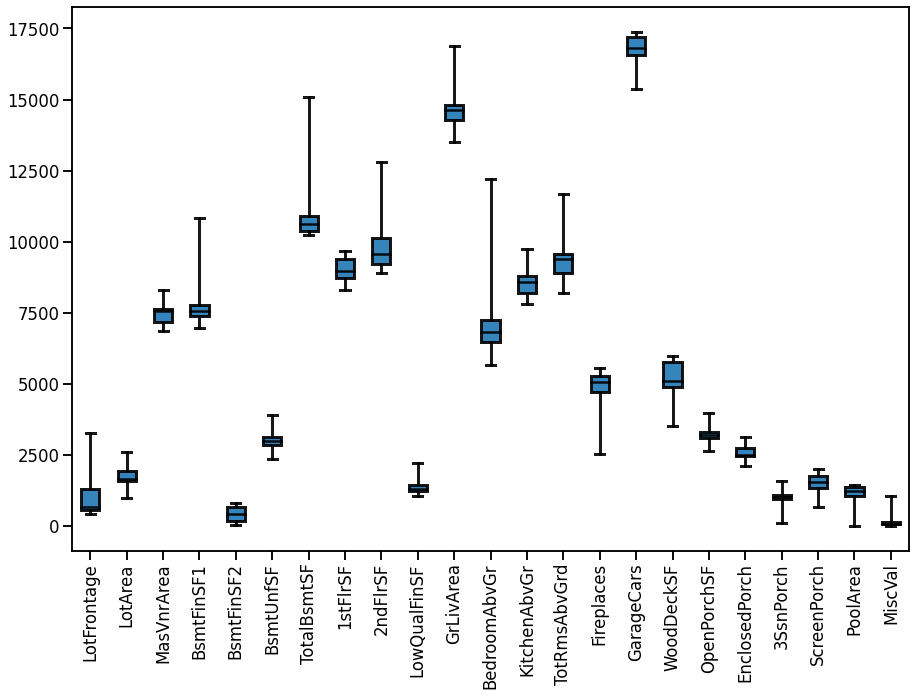

In [85]:
from sklearn.linear_model import RidgeCV
import numpy as np

alphas=np.logspace(-1, 3, num=30)
model = make_pipeline(
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=alphas, store_cv_values=True)
)

cv_results = cross_validate(model, data_numerical, target, cv=10, return_estimator=True)
coef = pd.DataFrame([est[-1].coef_ for est in cv_results["estimator"]], columns=numerical_features)
_, ax = plt.subplots(figsize=(15, 10))
_ = coef.abs().plot.box(**boxplot_property, ax=ax)

#### Question 7

Check the parameter alpha\_ (the regularization strength) for the different ridge regressors obtained on each fold.
In which range does alpha\_ fall into for most folds?

 a) between 0.1 and 1  
 b) between 1 and 10  
 c) between 10 and 100    
 d) between 100 and 1000

 Je dirais c)

In [91]:
alpha = pd.DataFrame([est[-1].alpha_ for est in cv_results["estimator"]])
alpha

,0
0,280.721620
1,385.662042
2,280.721620
3,280.721620
4,385.662042
5,385.662042
6,280.721620
7,280.721620
8,57.361525
9,385.662042


#### Question 8

Now, we will tackle a classification problem instead of a regression problem. Load the Adult Census dataset with the following snippet of code and we will work only with numerical features.
```
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])
```

How many numerical features are present in the dataset contained in the variable data?

 a) 3  
 b) 4  
 c) 5

4) ?

In [93]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

data

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


#### Question 9
Are there any missing values in the dataset contained in the variable data?

 a) Yes  
 b) No

 Je dirais b)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


#### Question 10
Fit a sklearn.linear_model.LogisticRegression classifier using a 10-fold cross-validation to assess the performance. Since we are dealing with a linear model, do not forget to scale the data with a StandardScaler before training the model.

On average, how much better/worse/similar is the logistic regression to a dummy classifier that would predict the most frequent class? We will consider an increase or decrease of the accuracy score.

 a) Worse than a dummy classifier with a decrease of 0.04  
 b) Similar to a dummy classifier  
 c) Better than a dummy classifier with an increase 0.04

 Je dirais b)
 Et ba non c'était c)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

cv_results = cross_validate(model, data, target, cv=10, return_estimator=True)
print(cv_results["test_score"].mean())

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(data, target)
print(dummy.score(data, target))

0.7998445658834604
0.7607182343065395


#### Question 11
What is the most important feature seen by the logistic regression?

 a) "age"  
 b) "capital-gain"  
 c) "capital-loss"  
 d) "hours-per-week"

 Je dirais b)

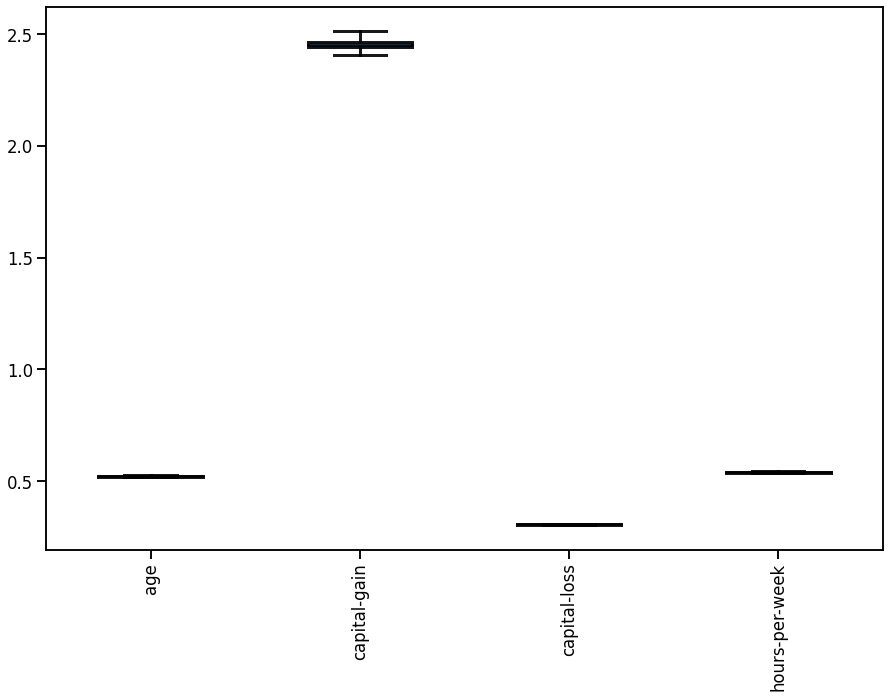

In [124]:
coef = pd.DataFrame([est[-1].coef_[0] for est in cv_results["estimator"]], columns=data.columns)
_, ax = plt.subplots(figsize=(15, 10))
_ = coef.abs().plot.box(**boxplot_property, ax=ax)


#### Question 12 : 

Now, we will work with both numerical and categorical features. You can load Adult Census with the following snippet:
```
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])
```

Are there any missing values in this dataset?

 a) Yes  
 b) No

 Je dirais b)

In [126]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


#### Question 13

Create a predictive model where the categorical data should be one-hot encoded, the numerical data should be scaled, and the predictor used should be a logistic regression classifier.

On average, what is the increase in terms of accuracy by using the categorical features?

 a) It gives similar results  
 b) It increases the statistical performance by 0.025  
 c) it increases the statistical performance by 0.05  
 d) it increases the statistical performance by 0.075  
 e) it increases the statistical performance by 0.1

 Je dirais c) (passage de 80% à 85%)

In [139]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()


preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
cv_results = cross_validate(model, data, target, cv=10, return_estimator=True)
cv_results["test_score"].mean()

0.8514802748221376

#### Question 14

For the following questions, you can use the following snippet to get the feature names after the preprocessing performed.
```
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["onehotencoder"]
                             .get_feature_names(categorical_columns)).tolist()
feature_names += numerical_columns
```

There is as many feature names as coefficients in the last step of your predictive pipeline.
What are the two most important features used by the logistic regressor?

 a) "hours-per-week" and "native-country_Columbia"  
 b) "workclass_?" and "naitive_country_?"  
 c) "capital-gain" and "education_Doctorate"

 Je dirais c)

In [145]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["one-hot-encoder"].get_feature_names(categorical_columns)).tolist()
feature_names += numerical_columns
feature_names

coef = pd.DataFrame([est[-1].coef_[0] for est in cv_results["estimator"]], columns=feature_names)
coef.mean().sort_values(ascending=False)

capital-gain                          2.138774
education_ Doctorate                  1.994776
education_ Prof-school                1.942538
marital-status_ Married-civ-spouse    1.646131
marital-status_ Married-AF-spouse     1.469286
                                        ...   
education_ 1st-4th                   -1.223862
education_ 7th-8th                   -1.246264
occupation_ Priv-house-serv          -1.286682
native-country_ Columbia             -1.402267
education_ Preschool                 -1.631633
Length: 106, dtype: float64

#### Question 15
What is the effect of decreasing the C parameter on the coefficients?

 a) shrinking the magnitude of the weights towards zeros  
 b) increasing the magnitude of the weights  
 c) reducing the weights' variance  
 d) increasing the weights' variance  
 e) it has no influence on the weights' variance

C vaut : 0.001
C vaut : 0.01
C vaut : 0.1
C vaut : 1


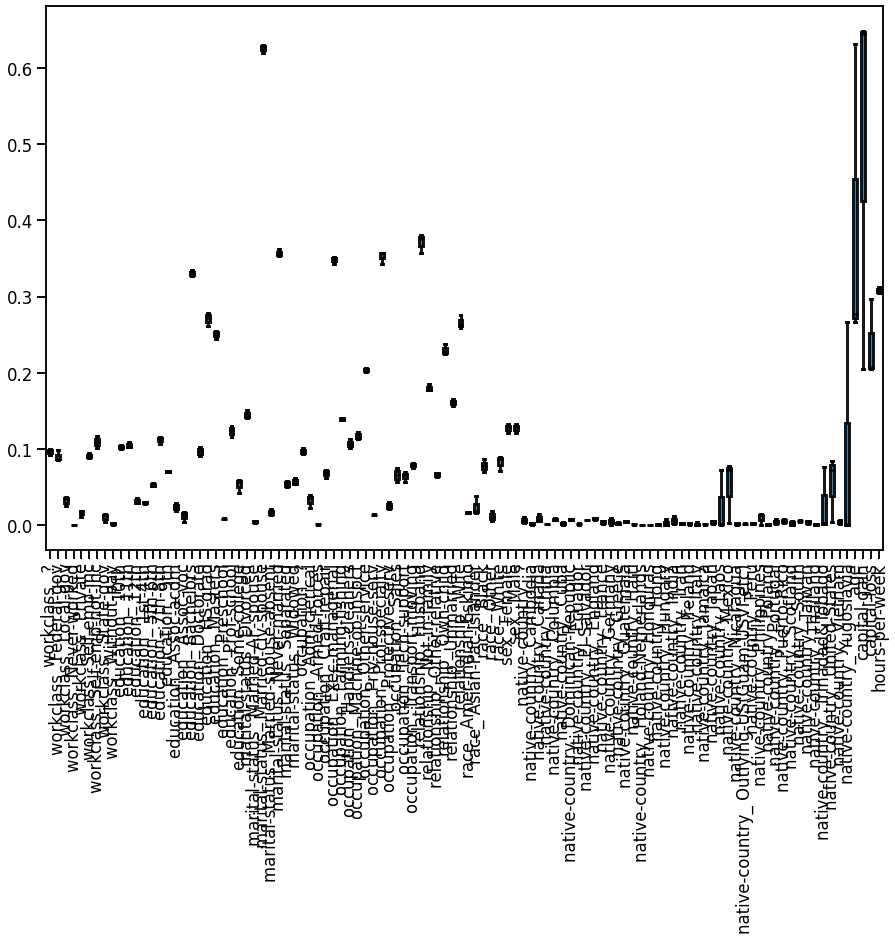

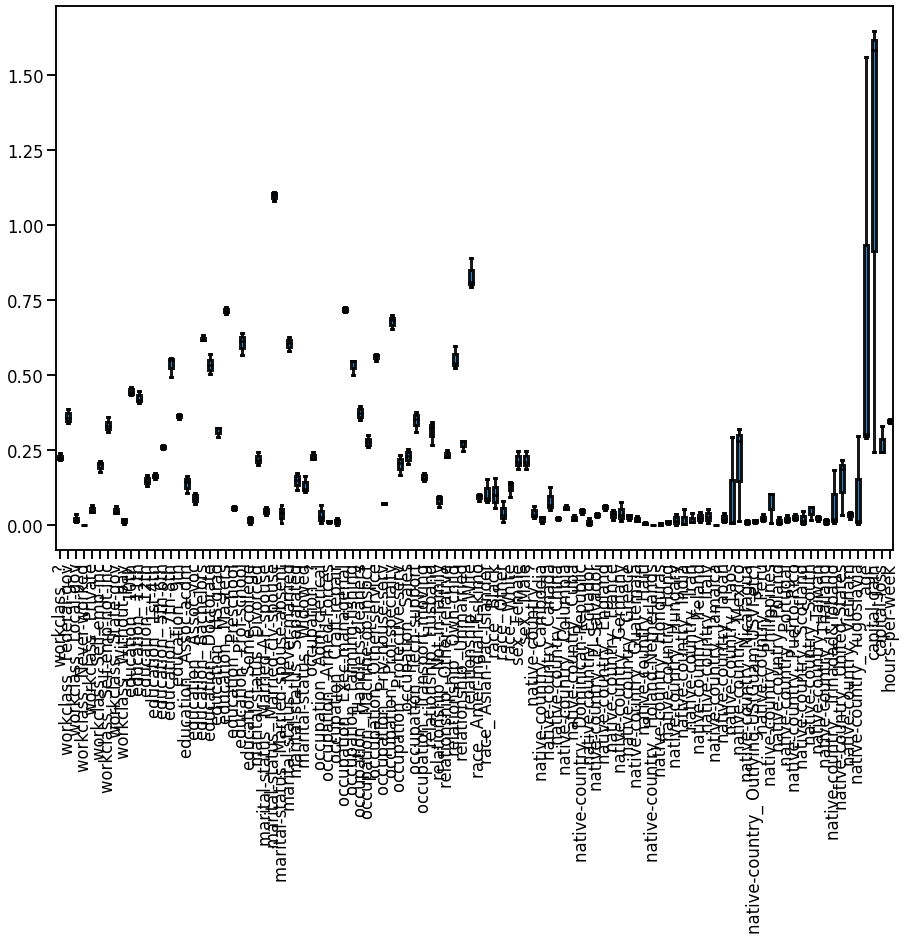

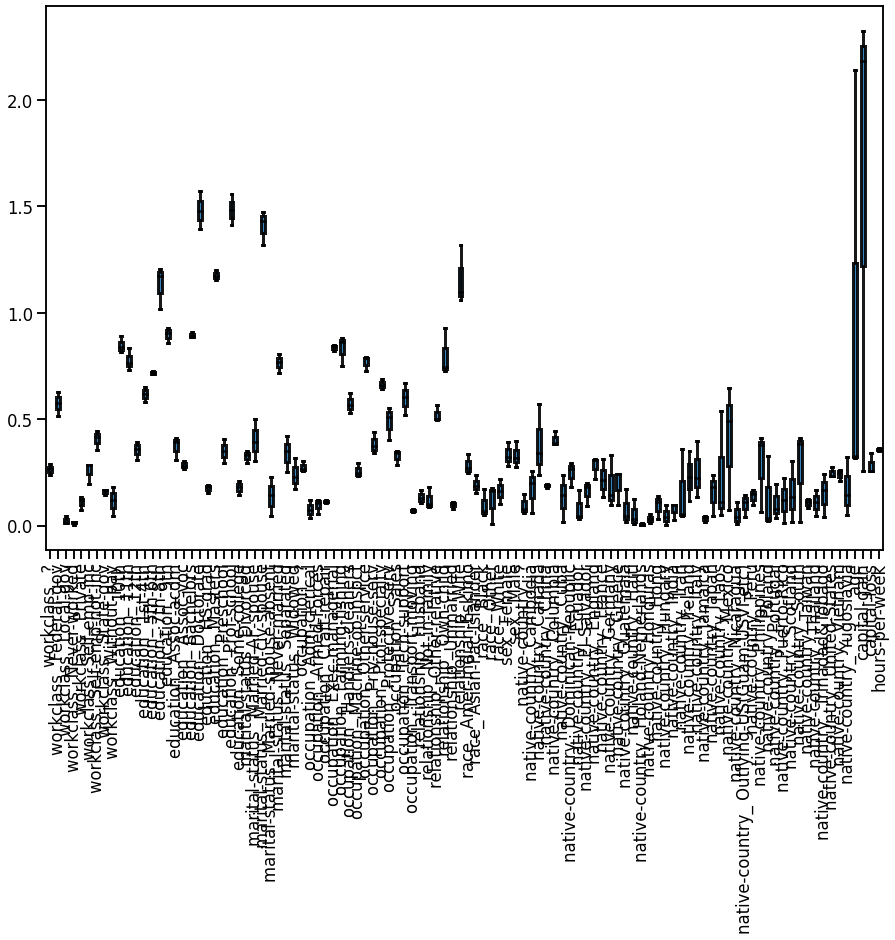

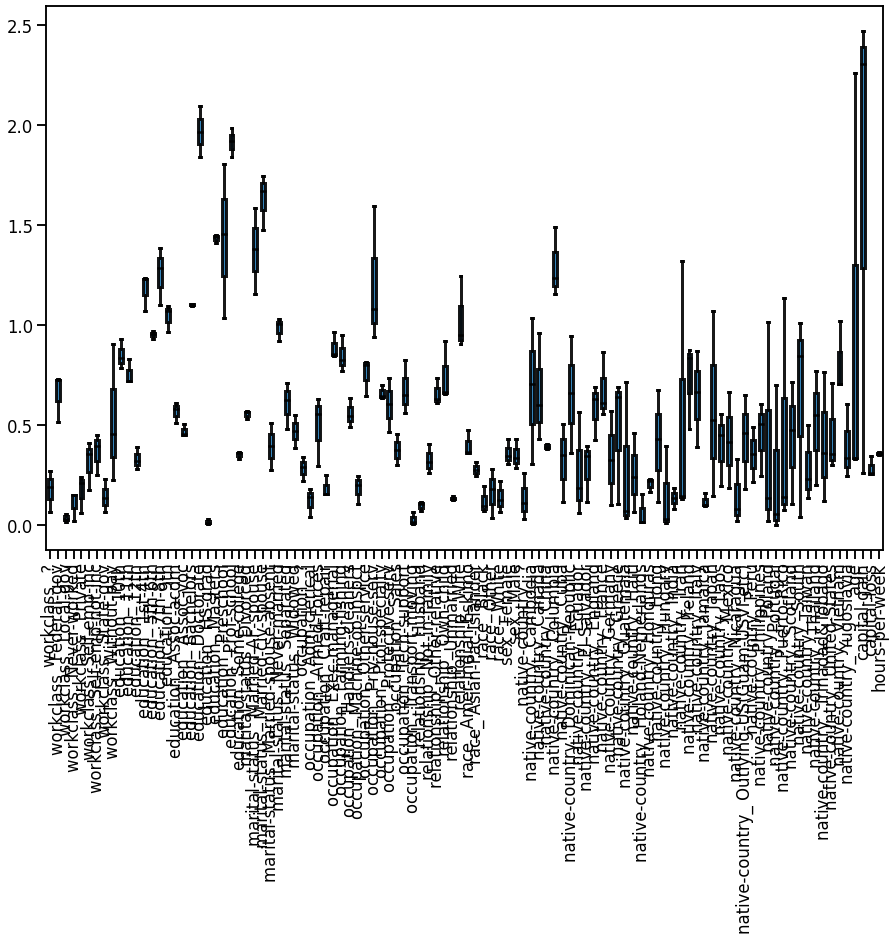

In [172]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
Cs = [0.001, 0.01, 0.1, 1]

for C in Cs:
    model.set_params(logisticregression__C=C)
    print(f"C vaut : {model.get_params()['logisticregression__C']}")

    cv_results = cross_validate(model, data, target, cv=3, return_estimator=True)
    coef = pd.DataFrame([est[-1].coef_[0] for est in cv_results["estimator"]], columns=feature_names)
    _, ax = plt.subplots(figsize=(15, 10))
    _ = coef.abs().plot.box(**boxplot_property, ax=ax)